In [1]:
import pandas as pd
import matplotlib
import sys
import numpy.random as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
# https://scikit-learn.org/stable/modules/tree.html#tree
df = pd.read_csv('songs.csv')

In [3]:
X = df[['year', 'length', 'commas', 'exclamations', 'colons', 'hyphens']]
Y = df['artist']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=31)

In [5]:
# f1_score > 0.85
from sklearn.metrics import f1_score

In [33]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier

precision = 0
recall = 0
f1 = 0
depth = 1
#while recall < 0.821:
while f1 < 0.822:
    dt = DecisionTreeClassifier(class_weight='balanced', min_samples_split=32,  max_depth=depth)
    clf = dt.fit(X_train, Y_train)
    y_pred = dt.predict(X_test)
    f1 = f1_score(Y_test, y_pred, average='micro')
    print(f1)
    print(depth)
    depth+=1

0.6333333333333333
1
0.7444444444444445
2
0.8111111111111111
3
0.8111111111111111
4
0.8222222222222222
5


In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)

cm

array([[21,  5,  2],
       [ 5, 20,  1],
       [ 3,  0, 33]], dtype=int64)

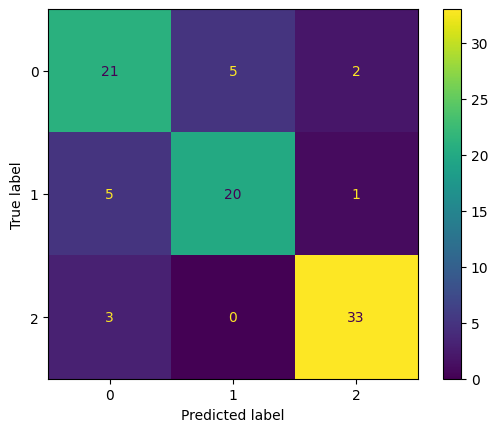

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [23]:
%%time

from sklearn.model_selection import GridSearchCV

cls = DecisionTreeClassifier()
parameters = {'min_samples_split': range(2,40), 'max_depth': range(1,10), 'criterion': ["gini", "entropy", "log_loss"], 'min_samples_leaf': range(1,10) }

search = GridSearchCV(clf, parameters, scoring='f1_micro')
search.fit(X, Y)

best_tree = search.best_estimator_

CPU times: total: 58.1 s
Wall time: 3min 33s


In [24]:
print(search.best_score_)
print(search.best_params_)

0.7694444444444445
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [25]:
y_pred = best_tree.predict(X_test)
f1 = f1_score(Y_test, y_pred, average='micro')
print(f1)

0.8666666666666667


In [26]:
%%time
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(clf, parameters, scoring='f1_micro')
search.fit(X, Y)

best_tree = search.best_estimator_

CPU times: total: 62.5 ms
Wall time: 296 ms


In [27]:
print(search.best_score_)
print(search.best_params_)

0.7277777777777779
{'min_samples_split': 23, 'min_samples_leaf': 3, 'max_depth': 4, 'criterion': 'log_loss'}


In [28]:
y_pred = best_tree.predict(X_test)
f1 = f1_score(Y_test, y_pred, average='micro')
print(f1)

0.8333333333333334
